<a href="https://colab.research.google.com/github/Akkoma/Quantum_programmation_notebook/blob/main/VQE_Single_qubit_with_U3_gate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

[ 0.63772467 -0.74204756  0.20657362]


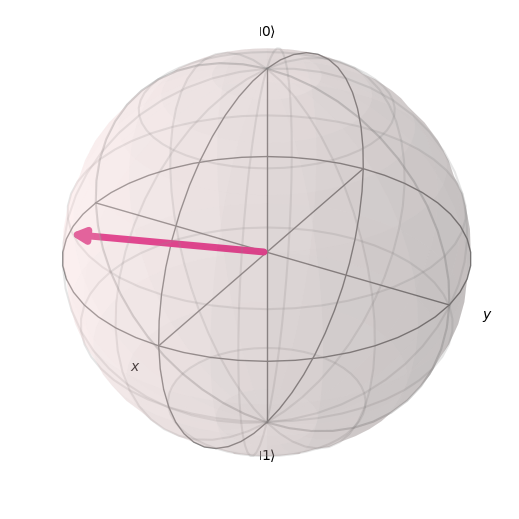

In [ ]:
import numpy as np
from qiskit.visualization import plot_bloch_vector

target_bloch_vector = 2 * np.random.rand(3) - 1
target_bloch_vector = target_bloch_vector / np.linalg.norm(target_bloch_vector)

print(target_bloch_vector)
plot_bloch_vector(target_bloch_vector)

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, SparsePauliOp
from qiskit.primitives import Estimator
import numpy as np

X = SparsePauliOp("X")
Y = SparsePauliOp("Y")
Z = SparsePauliOp("Z")

def get_var_form(params):
  qr = QuantumRegister(size=1, name='q')
  cr = ClassicalRegister(size=1, name='c')
  qc = QuantumCircuit(qr,cr)
  qc.u(params[0], params[1], params[2], qr[0])
  return qc

def cost_func(params):
  qc = get_var_form(params)

  result = Estimator().run(circuits=[qc for i in range(3)], observables=[X, Y, Z], shots=8192).result()
  bloch_vector = result.values.real

  cost = sum([np.abs(bloch_vector[i] - target_bloch_vector[i]) for i in range(3)]) # L1 norm

  return cost

In [ ]:
initial_guess = 2 * np.pi * np.random.rand(3)
initial_guess

array([4.57468719, 6.26625361, 3.99683739])

Target vector: [ 0.63772467 -0.74204756  0.20657362]
Initial guess vector: [-0.98956144  0.01767905 -0.14356243]
Initial guess vector:


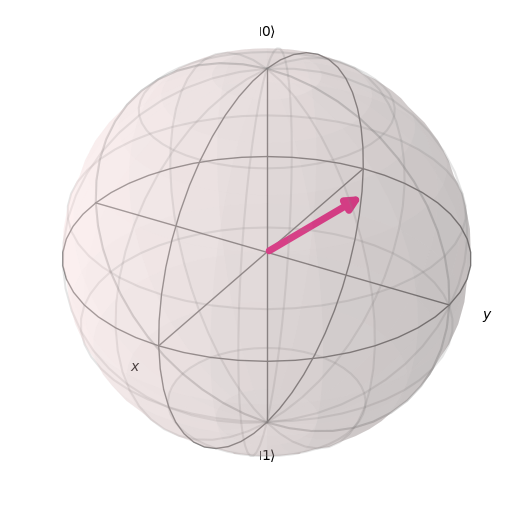

In [ ]:
qc = get_var_form(initial_guess)
result = Estimator().run(circuits=[qc for i in range(3)], observables=[X, Y, Z], shots=8192).result()
initial_bloch_vector = result.values.real

print("Target vector:", target_bloch_vector)
print("Initial guess vector:", initial_bloch_vector)
print("Initial guess vector:")

plot_bloch_vector(initial_bloch_vector)

In [ ]:
from scipy.optimize import minimize
res = minimize(fun=cost_func,
               x0=initial_guess,
               method="COBYLA",
               tol=1e-4,
               options={'maxiter':1000})
print(res)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: 0.03145082008630523
       x: [ 4.904e+00  8.584e+00  5.051e+00]
    nfev: 47
   maxcv: 0.0


Target vector: [ 0.63772467 -0.74204756  0.20657362]
Obtained vector: [ 0.6682443  -0.72655822  0.19975828]
Obtained vector:


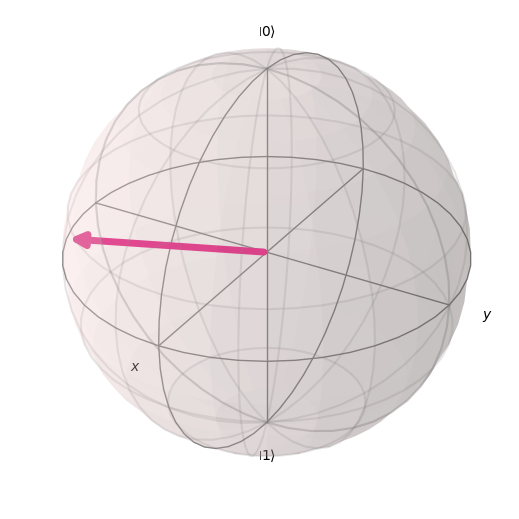

In [ ]:
qc = get_var_form(res.x)
result = Estimator().run(circuits=[qc for i in range(3)], observables=[X, Y, Z], shots=8192).result()
bloch_vector = result.values.real

print("Target vector:", target_bloch_vector)
print("Obtained vector:", bloch_vector)
print("Obtained vector:")

plot_bloch_vector(bloch_vector)